### Personality and its Transformations ###

An analysis of prof. Jordan Peterson's collection of lectures from University of Toronto personality course.

|    More about prof. Peterson at https://www.jordanbpeterson.com/

---

In [312]:
# main imports
import numpy as np
import pandas as pd
import re

import spacy
nlp = spacy.load('en_core_web_sm')

from nnsplit import NNSplit

from nltk.tokenize import sent_tokenize
from sentence_splitter import SentenceSplitter, split_text_into_sentences
from helper import split_into_sentences

from constants import *

import matplotlib.pyplot as plt

<div class="tomcolor8">  
<h4 style="background:#135e96; color:white ;font-size:15px;line-height:1em; text-align:left; padding: 20px">
      Version check</h4> 
</div>

In [304]:
def show_version(module_object: object, n: int = 20):
    """Output versions of a given Python library

    Args:
        module_object (object): library 
        n (int, optional): Number of chars between the first letter
        of the library's name the the first digit of the version number.
        Defaults to 20.

    """
    module_name = getattr(module_object, '__name__')
    module_ver = getattr(module_object, '__version__')
    
    # dots between the name of the library and it's version number
    dots = '.' * (n - len(module_name))
    
    print(f'{module_name}{dots}{module_ver}')


!python --version
module_list = [np, pd]
for module in module_list:
    show_version(module)

Python 3.7.5
numpy...............1.20.2
pandas..............1.2.4


<div class="tomcolor8">  
<h4 style="background:#135e96; color:white ;font-size:15px;line-height:1em; text-align:left; padding: 20px">
      Prepare the sentences</h4> 
</div>

### Load the data ###

In [4]:
with open(f'{OUTPUT_FOLDER}\{CAPTIONS_FILE_NAME}', 'r', encoding='utf-8') as f:
    data = f.read()
data = data.replace('\\', '')

In [5]:
type(data)

str

### Check different sentence splitting techniques ###

***sentence-splitter 1.4*** is a text to sentence splitter that uses heuristic algorithm made by Philipp Koehn and Josh Schroeder   
Repository available at https://github.com/mediacloud/sentence-splitter

In [6]:
splitter = SentenceSplitter(language='en')
output01 = splitter.split(text = data)

In [8]:
output01[:5]

['Well, after all that.',
 'So, welcome to Psychology 230.',
 'Nice to see you all here.',
 'So, what I’m going to do today—how I’m going to start—is I’m going to give you an overview of the content of the course and then I’ll give you an overview of the class requirements right at the end.',
 'But I think we might as well jump right into the content to begin with.']

***sent_tokenize*** returns a sentence-tokenized copy of text, using NLTK’s recommended sentence tokenizer (currently PunktSentenceTokenizer)

In [9]:
output02 = sent_tokenize(data)

In [10]:
output02[:5]

['Well, after all that.',
 'So, welcome to Psychology 230.',
 'Nice to see you all here.',
 'So, what I’m going to do today—how I’m going to start—is I’m going to give you an overview of the content of the course and then I’ll give you an overview of the class requirements right at the end.',
 'But I think we might as well jump right into the content to begin with.']

***split_into_sentences*** uses regex to split sentences. The function in described in helper file

In [12]:
output03 = split_into_sentences(data)

In [29]:
output03[:5]

['Well, after all that.',
 'So, welcome to Psychology 230.',
 'Nice to see you all here.',
 'So, what I’m going to do today—how I’m going to start—is I’m going to give you an overview of the content of the course and then I’ll give you an overview of the class requirements right at the end.',
 'But I think we might as well jump right into the content to begin with.']

In [30]:
print('Number of sentences produced by different sentence splitting methods:')
print(len(output01), '|', len(output02), '|', len(output03))

Number of sentences produced by different sentence splitting methods:
5616 | 5421 | 5669


***Spacy*** using Spacy to split sentences

In [240]:
doc = nlp(data)
output04 =  [str(sent) for sent in doc.sents]

In [250]:
output04[:5]

['Well, after all that.',
 'So, welcome to Psychology 230.',
 'Nice to see you all here.',
 'So, what I’m going to do today—how I’m going to start—is I’m going to give you an overview of the content of the course',
 'and then I’ll give you an overview of the class requirements right at the end.']

### Visualizing length of sentences ###

In [152]:
def visualize_sentences(list_of_sentences: list, percentile: int, \
  output_name: str, bins: int = 50, top: int = 5):
  """Print how many words are there in top longest sentences and output a 
  histogram showing how those sentences are distributed

  Args:
      list_of_sentences (list): sentences provided in a list form
      percentile (int): percentile value used for numpy's percentile function
      output_name (str): custom name of the sentences list - implemented to 
      distinguish between many different cases with different list sentences
      bins (int, optional): number of bins for pyplot. Defaults to 50.
      top (int, optional): number of sentences to show. Defaults to 5.
  """
  df = pd.DataFrame(list_of_sentences, columns = ['sentence'])
  df['length'] = df['sentence'].str.split().map(lambda x: len(x))
  
  if percentile == None:
    plt.hist(df['length'], bins = 10);
  else:
    df[df.length < np.percentile(df.length, 99)]['length'].hist(bins = bins)
  
  plt.title(f'Distribution of sentencens lengths using "{output_name}" with percentile {percentile}');
  print(f'Number of words in {top} longest sentences (no percentiles used)')
  print(df['length'].sort_values(ascending = False)[:top])
  print(f'Number of sentences in {output_name}: {len(list_of_sentences)}')

Number of words in 10 longest sentences (no percentiles used)
1085    13576
1084      445
1083      358
3506      205
3098      194
3417      176
3729      174
3220      162
3426      160
3466      158
Name: length, dtype: int64
Number of sentences in output01: 5616


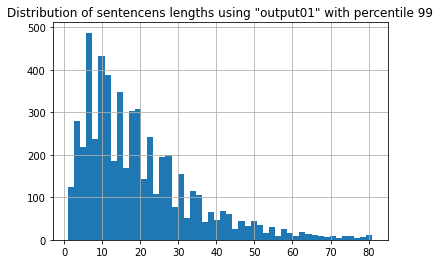

In [153]:
visualize_sentences(output01, percentile = 99, output_name ='output01', bins = 50, top = 10)

Number of words in 10 longest sentences (no percentiles used)
998     13658
995       360
997       236
3034      211
3307      205
3229      197
2915      194
3221      176
3520      174
3268      158
Name: length, dtype: int64
Number of sentences in output02: 5421


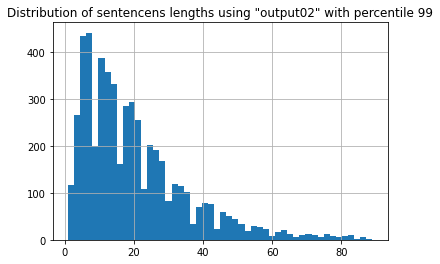

In [154]:
visualize_sentences(output02, percentile = 99, output_name ='output02', bins = 50, top = 10)

Number of words in 10 longest sentences (no percentiles used)
1094    13257
1091      360
1097      300
1093      236
3532      205
3122      194
3443      176
3756      174
3245      162
3452      161
Name: length, dtype: int64
Number of sentences in output03: 5669


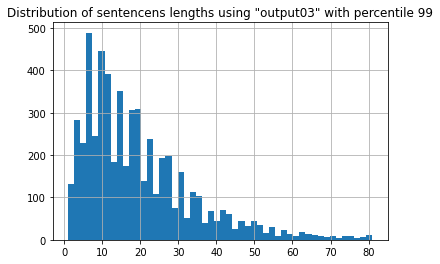

In [155]:
visualize_sentences(output03, percentile = 99, output_name ='output03', bins = 50, top = 10)

Number of words in 10 longest sentences (no percentiles used)
1174    541
1157    315
1149    294
1301    287
1172    282
1241    248
1294    237
1209    230
1312    207
1324    206
Name: length, dtype: int64
Number of sentences in output04: 6111


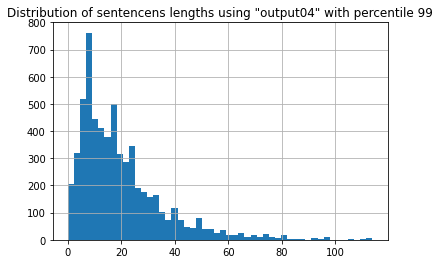

In [251]:
visualize_sentences(output04, percentile = 99, output_name ='output04', bins = 50, top = 10)

### Analyzing the longest sentences ###

The longest sentences in each case are outliers and should be addressed properly.

In [259]:
output01[1085][:1000]

"okay so we're going to talk about piaget today and as i believe i mentioned to you before piaget was perhaps the 20 20th century's foremost developmental psychologist he didn't really regard himself as a psychologist however in fact a lot of the people who've been great psychologists have come in from outside the field it's often engineers for example engineers have helped us establish most of our statistics anyways piaget i suppose would have regarded himself more as a biologist he called it called himself a genetic epistemologist and by genetic he didn't mean the genes that organize your cells and spin you up out of nothing he meant beginnings as in genesis and and then an epistemologist was someone who was interested in how structures of knowledge emerge and how they're constituted so he actually thought of himself as a biological philosopher now you know one of the things that's kind of sad about learning about great theories is that you hardly ever learn about how peculiar the pe

In [260]:
output02[998][:1000]

'", and you say "fine" i mean, maybe it\'s the lowest level, lowest resolution highest abstract srory "my day was fine" It\'s pretty boring story, it\'s better then terrible, I suppose it\'s not interesting, it\'s not detailed but person gets the notion that things went according to plan or, more specificly, that things unfolded the way you wanted them to\nokay so we\'re going to talk about piaget today and as i believe i mentioned to you before piaget was perhaps the 20 20th century\'s foremost developmental psychologist he didn\'t really regard himself as a psychologist however in fact a lot of the people who\'ve been great psychologists have come in from outside the field it\'s often engineers for example engineers have helped us establish most of our statistics anyways piaget i suppose would have regarded himself more as a biologist he called it called himself a genetic epistemologist and by genetic he didn\'t mean the genes that organize your cells and spin you up out of nothing h

In [261]:
output03[1094][:1000]

', and you say "fine" i mean, maybe it\'s the lowest level, lowest resolution highest abstract srory "my day was fine" It\'s pretty boring story, it\'s better then terrible, I suppose it\'s not interesting, it\'s not detailed but person gets the notion that things went according to plan or, more specificly, that things unfolded the way you wanted them to okay so we\'re going to talk about piaget today and as i believe i mentioned to you before piaget was perhaps the 20 20th century\'s foremost developmental psychologist he didn\'t really regard himself as a psychologist however in fact a lot of the people who\'ve been great psychologists have come in from outside the field it\'s often engineers for example engineers have helped us establish most of our statistics anyways piaget i suppose would have regarded himself more as a biologist he called it called himself a genetic epistemologist and by genetic he didn\'t mean the genes that organize your cells and spin you up out of nothing he 

In [262]:
output04[1174][:1000]

"so for example if you want to walk towards the door then you turn your head and you make yourself a mortal of the door and that model has to um be bounded by its relevance to your actions so you know the things that are going to be relevant to you about the door for example might be whether or not it's tall enough for you to walk through or whether or not the doors open or closed so that you can as you're walking towards it you can organize your body so that you can interact with the object as you see fit now you pick your goals and also for all sorts of different reasons and some of those reasons are more fundamental than others so for example fundamental by fundamental i would mean likely what i mean by fundamental is something like evolutionarily ancient you know so the the older the necessity or the older the system that's evolved to to allow you to pursue the necessity the more fundamental it is and there's there's ways of identifying what constitutes the fundamental elements of 

`output02` and `output03` are good candidates for choosing the right splitting technique. `output03` has more sentences and the lenght of the longest one is about 400 words shorter then i `output02`.But `output04` has the most sentences and the longest sentence is just below 550 words long. Data from `output04` will be used for furher analysis, but it's longest sentence needs to be shorter.

### Splitting the longest sentence into smaller ones ###

**NNSplit** is beeing used to split the longest sentence. This tool uses a neural network to perform sentence boundary detection.  
More information about this library is available at https://bminixhofer.github.io/nnsplit/

In [281]:
splitter = NNSplit.load('en')

LONGEST_SENTENCE_INDEX = 1174
splits = splitter.split([output04[LONGEST_SENTENCE_INDEX]])[0]

In [282]:
longest_sent_split = [str(splits[n]) for n, split in enumerate(splits)]

In [283]:
len(longest_sent_split)

22

The longest sentence from `output04` containig nearly 550 was split into 22 smaller sentences

### Final sentence construction ###

In [286]:
# put 22 smaller sentences into the position of the longest sentence
output04[LONGEST_SENTENCE_INDEX:LONGEST_SENTENCE_INDEX] = longest_sent_split

In [295]:
# delete the longest sentence
del output04[LONGEST_SENTENCE_INDEX+len(longest_sent_split)]

Number of words in 10 longest sentences (no percentiles used)
1157    315
1149    294
1322    287
1172    282
1262    248
1315    237
1230    230
1333    207
1345    206
1327    205
Name: length, dtype: int64
Number of sentences in final_sentences: 6132


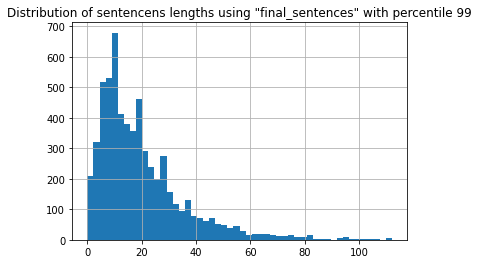

In [297]:
# final visualisation
visualize_sentences(output04, 99, 'final_sentences', 50, 10)

In [313]:
# save final captions to a file
with open(f'{OUTPUT_FOLDER}\{FINAL_CAPTIONS_FILE_NAME}', 'w', encoding='utf-8') as f:
    for line in output04:
        f.write(f"{line}\n")

---